In [2]:
%matplotlib inline
import numpy.random as rd
import matplotlib.pyplot as plt
import numpy as np

from time import sleep, monotonic

import qcodes as qc
from qcodes import Station, load_or_create_experiment, \
    initialise_database, Measurement, load_by_run_spec, load_by_guid
from qcodes.tests.instrument_mocks import DummyInstrument, DummyInstrumentWithMeasurement
from qcodes.dataset.plotting import plot_dataset
from qcodes.dataset.descriptions.detect_shapes import detect_shape_of_measurement

qc.logger.start_all_logging()

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/fabrizioberr/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/fabrizioberr/.qcodes/logs/210620-65024-qcodes.log


In [3]:
# preparatory mocking of physical setup

dac = DummyInstrument('dac', gates=['ch1', 'ch2'])
dmm = DummyInstrumentWithMeasurement(name='dmm', setter_instr=dac)

station = qc.Station(dmm, dac)

In [4]:
initialise_database()
exp = load_or_create_experiment(
    experiment_name='performing_meas_using_parameters_and_dataset',
    sample_name="no sample"
)
qc.config.core.db_location

In [9]:
meas = Measurement(exp=exp, name='exponential_decay')
meas.register_parameter(dac.ch1)  # register the first independent parameter
meas.register_parameter(dmm.v1, setpoints=(dac.ch1,))  # now register the dependent one

meas.write_period = 0.5

with meas.run() as datasaver:
    for set_v in np.linspace(0, 25, 10):
        dac.ch1.set(set_v)
        get_v = dmm.v1.get()
        datasaver.add_result((dac.ch1, set_v),
                             (dmm.v1, get_v))
        #if get_v > 1e-8:
         #   break                     

    dataset1D = datasaver.dataset  # convenient to have for data access and plotting

Starting experimental run with id: 27. 


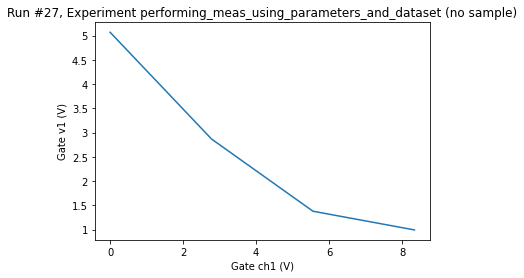

In [10]:
ax, cbax = plot_dataset(dataset1D)

'~/experiments.db'